<a href="https://colab.research.google.com/github/GabiHan/ML-Suicide-Analysis/blob/main/SuicideData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multiple variables analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import pickle


# Dataframe displaying

In [ ]:
df = pd.read_csv('/content/social-media-impact-on-suicide-rates.csv')
print(df.to_string())

    year   sex           S          ST          SF
0   2010  BTSX  100.000000  100.000000  100.000000
1   2010  FMLE  100.000000  100.000000  100.000000
2   2010   MLE  100.000000  100.000000  100.000000
3   2011  BTSX   98.681894  216.666667  138.980263
4   2011  FMLE   98.183773  216.666667  138.980263
5   2011   MLE   98.795530  216.666667  138.980263
6   2012  BTSX   98.595123  342.592593  173.684211
7   2012  FMLE   97.653750  342.592593  173.684211
8   2012   MLE   98.857511  342.592593  173.684211
9   2013  BTSX   97.119135  446.296296  201.973684
10  2013  FMLE   95.672700  446.296296  201.973684
11  2013   MLE   97.517070  446.296296  201.973684
12  2014  BTSX   95.848213  533.333333  229.111842
13  2014  FMLE   94.606231  533.333333  229.111842
14  2014   MLE   96.154775  533.333333  229.111842
15  2015  BTSX   94.177492  564.814815  261.677632
16  2015  FMLE   93.219199  564.814815  261.677632
17  2015   MLE   94.350025  564.814815  261.677632
18  2016  BTSX   91.676469  588

In [ ]:
#S is suicide rate change by % since 2010
#ST is suicide rate change by % since 2010 for Twitter users
#SF is suicide rate change by % since 2010 for Facebook users
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    30 non-null     int64  
 1   sex     30 non-null     object 
 2   S       30 non-null     float64
 3   ST      30 non-null     float64
 4   SF      30 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.3+ KB
None


In [ ]:
#cleaning the dataframe
new_df = df.dropna()
print(new_df.to_string())

    year   sex           S          ST          SF
0   2010  BTSX  100.000000  100.000000  100.000000
1   2010  FMLE  100.000000  100.000000  100.000000
2   2010   MLE  100.000000  100.000000  100.000000
3   2011  BTSX   98.681894  216.666667  138.980263
4   2011  FMLE   98.183773  216.666667  138.980263
5   2011   MLE   98.795530  216.666667  138.980263
6   2012  BTSX   98.595123  342.592593  173.684211
7   2012  FMLE   97.653750  342.592593  173.684211
8   2012   MLE   98.857511  342.592593  173.684211
9   2013  BTSX   97.119135  446.296296  201.973684
10  2013  FMLE   95.672700  446.296296  201.973684
11  2013   MLE   97.517070  446.296296  201.973684
12  2014  BTSX   95.848213  533.333333  229.111842
13  2014  FMLE   94.606231  533.333333  229.111842
14  2014   MLE   96.154775  533.333333  229.111842
15  2015  BTSX   94.177492  564.814815  261.677632
16  2015  FMLE   93.219199  564.814815  261.677632
17  2015   MLE   94.350025  564.814815  261.677632
18  2016  BTSX   91.676469  588

In [ ]:
#check out for duplicates data
print(df.duplicated())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool


# Global suicide dataframe analysis since 2010


Linear regression fitting formula for multiple variable is y=m1*x1 + m2*x2 + m3*x3 +b

In [ ]:
#Suicide rate depends on gender and year so S=m1*year + m2*sex +b
reg = linear_model.LinearRegression()
reg.fit(df[['year']],df.S)

LinearRegression()

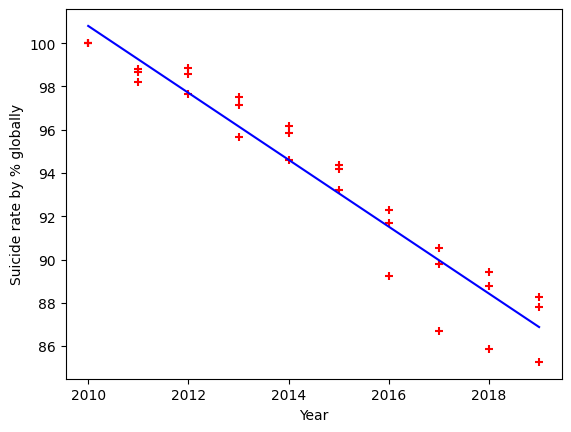

In [ ]:
#show the evolution rate of suicide per year
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Suicide rate by % globally')
plt.scatter(df.year, df.S, color= 'red', marker='+')

#linear regression
plt.plot(df.year, reg.predict(df[['year']]), color='blue')

Gradient descent

The cost function is used to evaluate the performance of the model at each iteration, and the algorithm aims to minimize it. It is used to approach the predicted values as much as possible. This process is repeated for many iterations until the cost function reaches a minimum, meaning the model parameters have converged to the best possible values.

The cost function measures the prediction error.
Gradient descent aims to minimize this cost by iteratively adjusting the model's parameters.
The cost function guides the optimization process, and its value decreases as the model becomes more accurate over time.

In [ ]:
def gradient_descent(x,y):
  m_curr = b_curr = 0
  iterations = 100000
  n = len(x)
  learning_rate = 0.0000001

  for i in range (iterations):
    y_predicted = m_curr * x + b_curr
    cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
    md = -(2/n)*sum(x*(y-y_predicted))
    bd = -(2/n)*sum(y-y_predicted)
    m_curr = m_curr - learning_rate * md
    b_curr = b_curr - learning_rate * bd
    print("m {}, b {}, cost {} iteration {}".format(m_curr,b_curr, cost, i))

x = df.year
y = df.S
print(gradient_descent(x,y))


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
m 0.04657761463127838, b 0.00014705427791994469, cost 22.45213615632486 iteration 95001
m 0.046577614630630815, b 0.0001470555824515674, cost 22.452136156307848 iteration 95002
m 0.04657761462998324, b 0.00014705688698319014, cost 22.452136156290827 iteration 95003
m 0.04657761462933567, b 0.00014705819151481287, cost 22.45213615627382 iteration 95004
m 0.046577614628688105, b 0.0001470594960464356, cost 22.45213615625681 iteration 95005
m 0.04657761462804053, b 0.00014706080057805832, cost 22.45213615623978 iteration 95006
m 0.04657761462739297, b 0.00014706210510968105, cost 22.452136156222746 iteration 95007
m 0.046577614626745395, b 0.00014706340964130375, cost 22.45213615620574 iteration 95008
m 0.04657761462609782, b 0.00014706471417292647, cost 22.452136156188715 iteration 95009
m 0.04657761462545026, b 0.0001470660187045492, cost 22.45213615617171 iteration 95010
m 0.04657761462480269, b 0.00014706732

check a and b from y=ax+b

In [ ]:

reg.coef_


array([-1.5461373])

In [ ]:
reg.intercept_

3208.5308559488867

In [ ]:
#Visualisation of how the .predict works
a= reg.coef_
x=2013
b=reg.intercept_
y=a*x+b
print(y)

[96.15648033]


Save model with joblib and pickle

In [ ]:
with open("model_pickle","wb") as f:
  pickle.dump(reg,f)


In [ ]:
with open("model_pickle","rb") as f:
  model_pickle = pickle.load(f)

In [ ]:
model_pickle.predict([[2013]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([379.02356902])

In [ ]:
reg.predict([[2013]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([379.02356902])

 Dummy Variables & One Hot Encoding

In [48]:
dummies = pd.get_dummies(df.sex)
dummies

,BTSX,FMLE,MLE
0,True,False,False
1,False,True,False
2,False,False,True
3,True,False,False
4,False,True,False
5,False,False,True
6,True,False,False
7,False,True,False
8,False,False,True
9,True,False,False


from matplotlib import pyplot as plt
_df_18['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_19.groupby('BTSX').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_20.groupby('FMLE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_21.groupby('MLE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('BTSX')):
  _plot_series(series, series_name, i)
  fig.legend(title='BTSX', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('FMLE')):
  _plot_series(series, series_name, i)
  fig.legend(title='FMLE', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('MLE')):
  _plot_series(series, series_name, i)
  fig.legend(title='MLE', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_25['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['FMLE'].value_counts()
    for x_label, grp in _df_26.groupby('BTSX')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('BTSX')
_ = plt.ylabel('FMLE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['MLE'].value_counts()
    for x_label, grp in _df_27.groupby('FMLE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('FMLE')
_ = plt.ylabel('MLE')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_28['BTSX'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_28, x='index', y='BTSX', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_29['FMLE'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_29, x='index', y='FMLE', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_30['MLE'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_30, x='index', y='MLE', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Merge dataframe with recently generated dummies variable

In [49]:
merge = pd.concat([df,dummies],axis='columns')
merge

,year,sex,S,ST,SF,BTSX,FMLE,MLE
0,2010,BTSX,100.000000,100.000000,100.000000,True,False,False
1,2010,FMLE,100.000000,100.000000,100.000000,False,True,False
2,2010,MLE,100.000000,100.000000,100.000000,False,False,True
3,2011,BTSX,98.681894,216.666667,138.980263,True,False,False
4,2011,FMLE,98.183773,216.666667,138.980263,False,True,False
5,2011,MLE,98.795530,216.666667,138.980263,False,False,True
6,2012,BTSX,98.595123,342.592593,173.684211,True,False,False
7,2012,FMLE,97.653750,342.592593,173.684211,False,True,False
8,2012,MLE,98.857511,342.592593,173.684211,False,False,True
9,2013,BTSX,97.119135,446.296296,201.973684,True,False,False


In [50]:
#drop the sex column
final = merge.drop(['sex', 'BTSX'],axis='columns')
final

,year,S,ST,SF,FMLE,MLE
0,2010,100.000000,100.000000,100.000000,False,False
1,2010,100.000000,100.000000,100.000000,True,False
2,2010,100.000000,100.000000,100.000000,False,True
3,2011,98.681894,216.666667,138.980263,False,False
4,2011,98.183773,216.666667,138.980263,True,False
5,2011,98.795530,216.666667,138.980263,False,True
6,2012,98.595123,342.592593,173.684211,False,False
7,2012,97.653750,342.592593,173.684211,True,False
8,2012,98.857511,342.592593,173.684211,False,True
9,2013,97.119135,446.296296,201.973684,False,False


In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [57]:
X = final.drop('S',axis='columns')
X

,year,ST,SF,FMLE,MLE
0,2010,100.000000,100.000000,False,False
1,2010,100.000000,100.000000,True,False
2,2010,100.000000,100.000000,False,True
3,2011,216.666667,138.980263,False,False
4,2011,216.666667,138.980263,True,False
5,2011,216.666667,138.980263,False,True
6,2012,342.592593,173.684211,False,False
7,2012,342.592593,173.684211,True,False
8,2012,342.592593,173.684211,False,True
9,2013,446.296296,201.973684,False,False


In [58]:
Y = final.S
Y

,S
0,100.000000
1,100.000000
2,100.000000
3,98.681894
4,98.183773
5,98.795530
6,98.595123
7,97.653750
8,98.857511
9,97.119135


In [59]:
model.fit(X,Y)

LinearRegression()

In [64]:
model.predict([[2010,100,100,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([100.75317755])

In [65]:
model.score(X,Y)

0.9763196607306577

In [67]:
from sklearn.preprocessing import LabelEncoder

In [69]:
le = LabelEncoder()

In [72]:
df_le = df
df_le.sex = le.fit_transform(df_le.sex)


array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
       1, 2, 0, 1, 2, 0, 1, 2])

In [76]:
df_le

,year,sex,S,ST,SF
0,2010,BTSX,100.000000,100.000000,100.000000
1,2010,FMLE,100.000000,100.000000,100.000000
2,2010,MLE,100.000000,100.000000,100.000000
3,2011,BTSX,98.681894,216.666667,138.980263
4,2011,FMLE,98.183773,216.666667,138.980263
5,2011,MLE,98.795530,216.666667,138.980263
6,2012,BTSX,98.595123,342.592593,173.684211
7,2012,FMLE,97.653750,342.592593,173.684211
8,2012,MLE,98.857511,342.592593,173.684211
9,2013,BTSX,97.119135,446.296296,201.973684


In [77]:
X = df[['sex', 'S']]
X


,sex,S
0,BTSX,100.000000
1,FMLE,100.000000
2,MLE,100.000000
3,BTSX,98.681894
4,FMLE,98.183773
5,MLE,98.795530
6,BTSX,98.595123
7,FMLE,97.653750
8,MLE,98.857511
9,BTSX,97.119135



# For Facebook users

In [ ]:
#Find the linear regression for Facebook users suicide rate
reg.fit(df[['year']],df.SF)

LinearRegression()

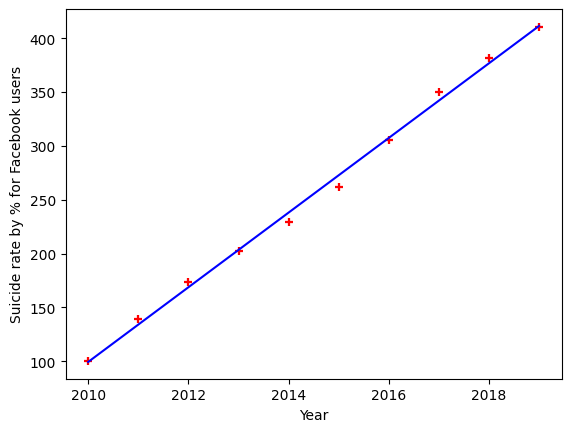

In [ ]:
#for facebook users
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Suicide rate by % for Facebook users')
plt.scatter(df.year, df.SF, color= 'red', marker='+')

#linear regression for facebook users
plt.plot(df.year, reg.predict(df[['year']]), color='blue')

In [ ]:
reg.predict([[2013]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([203.37021531])

# For Twitter users


In [ ]:
#Find the linear regression for Twitter users suicide rate
reg.fit(df[['year']],df.ST)

LinearRegression()

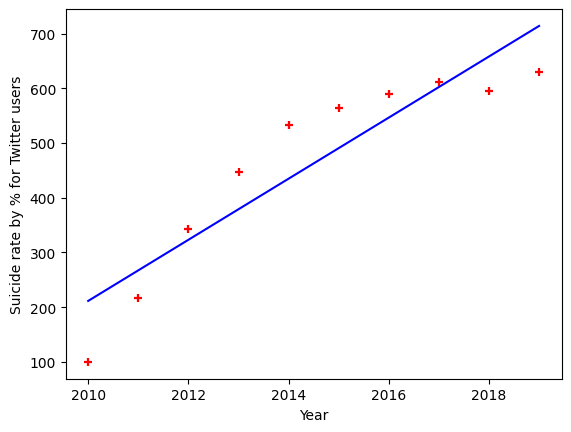

In [ ]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Suicide rate by % for Twitter users')
plt.scatter(df.year, df.ST, color= 'red', marker='+')

plt.plot(df.year, reg.predict(df[['year']]), color='blue')